## 1. Importing libraries

In [223]:
import pandas as pd
import requests
import json
from IPython.display import Image
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

## 2. gathering data 
    1. gathering data from twitter-archive-enhanced.csv as t_archive
    2. gathering data from image-predictions.tsv as image_p
    3.getting tweet data from twitter API
    4. gathering data from json file and making a data frame using empty list

#### 2.1. gathering data from twitter-archive-enhanced.csv as t_archive

In [224]:
t_archive=pd.read_csv('twitter-archive-enhanced.csv')

#### 2.2. gathering data from image-predictions.tsv as image_p

In [225]:
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response=requests.get(url)
with open('image-predictions.tsv',mode='wb') as file:
    file.write(response.content)
image_p=pd.read_csv('image-predictions.tsv',sep='\t')

#### 2.3. getting tweet data from twitter API

In [226]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

ModuleNotFoundError: No module named 'tweepy'

#### 2.4. gathering data from json file and making a data frame using empty list

In [227]:
# a.3. gathering tweet data from json file
df_list=[]
with open ("tweet-json.txt")as file:
    for l in file:
        df_list.append(json.loads(l))
        
tweet_df=pd.DataFrame(df_list,columns=['id','retweet_count','favorite_count'])
tweet_df=tweet_df.rename(columns={'id':'tweet_id'})
tweet_df.to_csv('tweet_df.csv',index=False)

## 2. Assessing data
   ### 1. Tidiness
        1. merge four columns (doggo & floofer & pupper & puppo) in one column dog_stage
        2. all data sets is related but separated into 3 df.
   ### 2. Quality
   ####     1. t_archive
            1. For dog stage, there are some rows with multiple dog stages
            2. there are 181 retweeted_status_id to be removed
            3. 23 rating_denominator not equal 10
            4. Convert tweet_id from int to object
            5. Convert timestamp from object to datetime
            6. remove columns ('retweeted_status_id' & 'retweeted_status_user_id')
            7. from name column remove rows depend on None & a value 
   ####     2. image_p
            1. missing picture for some ID's "remove any ID without photo"
            2. some P names srarting with uppercase letter "convert all letter to be lowercass"
            3. missing entries 2075 insted of 2356
   ####     3. tweet_df
            1. missing entries 2354 insted of 2356

#### Assassing twitter-archive-enhanced Data

In [228]:
#exploring the first five rows from the data
t_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [229]:
t_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [230]:
t_archive['rating_numerator'].describe()

count    2356.000000
mean       13.126486
std        45.876648
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [231]:
t_archive.name.value_counts()
# name non to be removed from the data set

None       745
a           55
Charlie     12
Cooper      11
Oliver      11
          ... 
Mabel        1
Lizzie       1
Derby        1
Marvin       1
Ralph        1
Name: name, Length: 957, dtype: int64

In [232]:
t_archive[t_archive['rating_numerator']<10].count()['rating_numerator']
# number of rating_numerator less than 10

440

In [233]:
t_archive['rating_denominator'].describe()

count    2356.000000
mean       10.455433
std         6.745237
min         0.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       170.000000
Name: rating_denominator, dtype: float64

In [234]:
t_archive[t_archive['rating_denominator']!=10].count()['rating_denominator']
# number of rating_denominator not equal 10

23

#### Assissing image predication Data

In [235]:
#exploring random 10 rows from the data
image_p.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1187,739485634323156992,https://pbs.twimg.com/media/CkMuP7SWkAAD-2R.jpg,2,Walker_hound,0.640256,True,English_foxhound,0.229799,True,beagle,0.037754,True
456,674774481756377088,https://pbs.twimg.com/media/CV1HztsWoAAuZwo.jpg,1,Chihuahua,0.407016,True,French_bulldog,0.309978,True,Siamese_cat,0.227677,False
566,678334497360859136,https://pbs.twimg.com/media/CWntoDVWcAEl3NB.jpg,1,Norfolk_terrier,0.378643,True,golden_retriever,0.095594,True,kelpie,0.085309,True
1490,782722598790725632,https://pbs.twimg.com/media/CtzKC7zXEAALfSo.jpg,1,Irish_setter,0.574557,True,golden_retriever,0.339251,True,seat_belt,0.046108,False
865,697463031882764288,https://pbs.twimg.com/media/Ca3i7CzXIAMLhg8.jpg,1,Labrador_retriever,0.999885,True,golden_retriever,0.000098,True,pug,0.000008,True
970,706538006853918722,https://pbs.twimg.com/media/Cc4gjxqW4AIoThO.jpg,1,chow,0.541794,True,Pembroke,0.094918,True,Pomeranian,0.085439,True
1149,731285275100512256,https://pbs.twimg.com/media/CiYME3tVAAENz99.jpg,1,Pembroke,0.967103,True,Cardigan,0.021126,True,Chihuahua,0.002231,True
1561,793286476301799424,https://pbs.twimg.com/media/CwJR1okWIAA6XMp.jpg,1,Afghan_hound,0.274637,True,borzoi,0.142204,True,doormat,0.109677,False
585,678991772295516161,https://pbs.twimg.com/media/CWxDaXHWsAAWV8W.jpg,1,Eskimo_dog,0.330216,True,Siberian_husky,0.187003,True,Chihuahua,0.101420,True
707,685169283572338688,https://pbs.twimg.com/media/CYI10WhWsAAjzii.jpg,1,Bernese_mountain_dog,0.975096,True,Appenzeller,0.014578,True,EntleBucher,0.005943,True


In [236]:
#Extracting the url of image in index 302 p1_dog True, p2_dog False, p3_dog True
image_p.loc[302,'jpg_url']

'https://pbs.twimg.com/media/CVGp4LKWoAAoD03.jpg'

In [237]:
#exploring the photo 
Image(url='https://pbs.twimg.com/media/CVGp4LKWoAAoD03.jpg')

In [238]:
image_p.info()
# converting tweet_id from int to object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


#### Assassing tweet Data

In [239]:
#exploring the first five rows from the data
tweet_df.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [240]:
tweet_df.info()
# converting tweet_id from int to object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


## 3. Cleaning phase
    before we starting cleaning phase we will make a copy of our data

In [241]:
#creating a copy from the data frames
clean_t_archive=t_archive.copy()
clean_image_p=image_p.copy()
clean_tweet_df=tweet_df.copy()

### Define issue 1
    For dog stage, there are some rows with multiple dog stages

### Code issue 1

In [242]:
#handle none
clean_t_archive.doggo.replace('None', '', inplace=True)
clean_t_archive.floofer.replace('None', '', inplace=True)
clean_t_archive.pupper.replace('None', '', inplace=True)
clean_t_archive.puppo.replace('None', '', inplace=True)

# merge into column
clean_t_archive['dog_stage'] = clean_t_archive.doggo + clean_t_archive.floofer + clean_t_archive.pupper + clean_t_archive.puppo

# handle multiple stages
clean_t_archive.loc[clean_t_archive.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo, pupper'
clean_t_archive.loc[clean_t_archive.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo, puppo'
clean_t_archive.loc[clean_t_archive.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo, floofer'

# handle missing values
clean_t_archive.loc[clean_t_archive.dog_stage == '', 'dog_stage'] = np.nan



### Test issue 1

In [243]:
clean_t_archive['dog_stage'].value_counts()

pupper            245
doggo              83
puppo              29
doggo, pupper      12
floofer             9
doggo, puppo        1
doggo, floofer      1
Name: dog_stage, dtype: int64

### Define issue 2
    Delete the 4 columnc ('doggo' & 'floofer' & 'pupper' & 'puppo')

In [244]:
clean_t_archive.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage
2134,670069087419133954,NaN,NaN,2015-11-27 02:38:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Randall. He's from Chernobyl. Built pl...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670069087...,5,10,Randall,,,,,NaN
1451,695794761660297217,NaN,NaN,2016-02-06 02:22:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Wyatt. His throne is modeled after him...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/695794761...,13,10,Wyatt,,,,,NaN
2275,667453023279554560,NaN,NaN,2015-11-19 21:22:56 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Meet Cupcake. I would do unspeakable things fo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667453023...,11,10,Cupcake,,,,,NaN
326,833826103416520705,NaN,NaN,2017-02-20 23:50:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Charlie. She asked u to change the channe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/833826103...,13,10,Charlie,,,,,NaN
160,860924035999428608,NaN,NaN,2017-05-06 18:27:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @tallylott: h*ckin adorable promposal. 13/1...,8.609145e+17,3.638908e+08,2017-05-06 17:49:42 +0000,https://twitter.com/tallylott/status/860914485...,13,10,None,,,,,NaN
1194,717428917016076293,NaN,NaN,2016-04-05 19:09:17 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Skittle. He's trying to communicate. 1...,NaN,NaN,NaN,https://vine.co/v/iIhEU2lVqxz,11,10,Skittle,,,,,NaN
867,761976711479193600,NaN,NaN,2016-08-06 17:26:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Shelby. She finds stuff to put on her ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/761976711...,12,10,Shelby,,,,,NaN
2010,672248013293752320,NaN,NaN,2015-12-03 02:56:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",10/10 for dog. 7/10 for cat. 12/10 for human. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672248013...,10,10,None,,,,,NaN
1723,680100725817409536,NaN,NaN,2015-12-24 19:00:23 +0000,"<a href=""https://about.twitter.com/products/tw...",This pupper is not coming inside until she cat...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680100725...,11,10,None,,,pupper,,pupper
604,798585098161549313,NaN,NaN,2016-11-15 17:54:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Timison. He just told a...,6.671828e+17,4.196984e+09,2015-11-19 03:29:07 +0000,https://twitter.com/dog_rates/status/667182792...,10,10,Timison,,,,,NaN


### Code issue 2

In [245]:
#merge the four columns into one column
clean_t_archive=clean_t_archive.drop(columns=['doggo','floofer','pupper','puppo'])


### Test issue 2

In [246]:
clean_t_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  dog_stage                   380 n

### Define issue 3
    merging all the data sets depend on the tweet_id
    

### Code issue 3

In [247]:
df_1=pd.merge(clean_t_archive,clean_tweet_df,on='tweet_id',how='left')
df=pd.merge(df_1,clean_image_p,on='tweet_id',how='left')

### Test issue 3

In [248]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  dog_stage                   380 n

### Define issue 4
    removing rating_denominator not equal 10

### Code issue 4

In [249]:
df=df[df['rating_denominator']==10]

### Test issue 4

In [250]:
df[df['rating_denominator']!=10].count()[0]

0

### Define Issue 5
    removing retweet columns

### Code issue 5

In [251]:
df=df.drop(columns=['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'])

### Test issue 5

In [252]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2333 entries, 0 to 2355
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2333 non-null   int64  
 1   in_reply_to_status_id  73 non-null     float64
 2   in_reply_to_user_id    73 non-null     float64
 3   timestamp              2333 non-null   object 
 4   source                 2333 non-null   object 
 5   text                   2333 non-null   object 
 6   expanded_urls          2278 non-null   object 
 7   rating_numerator       2333 non-null   int64  
 8   rating_denominator     2333 non-null   int64  
 9   name                   2333 non-null   object 
 10  dog_stage              380 non-null    object 
 11  retweet_count          2331 non-null   float64
 12  favorite_count         2331 non-null   float64
 13  jpg_url                2057 non-null   object 
 14  img_num                2057 non-null   float64
 15  p1  

### Define issue 6
    from name column remove rows depend on None & a value "there are more invaled names"

### Code issue 6

In [253]:
df=df[df['name']!= "None"]
df=df[df['name']!= "a"]

### Test issue 6

In [254]:
df.name.value_counts()

Charlie    12
Cooper     11
Oliver     11
Lucy       11
Penny      10
           ..
Lizzie      1
Derby       1
Marvin      1
Karll       1
Ralph       1
Name: name, Length: 952, dtype: int64

### Define issue 7
    converting tweet_id type from int to string

### Code issue 7

In [255]:
df['tweet_id']=df['tweet_id'].astype(str)

### Test issue 7

In [256]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1551 entries, 0 to 2349
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               1551 non-null   object 
 1   in_reply_to_status_id  1 non-null      float64
 2   in_reply_to_user_id    1 non-null      float64
 3   timestamp              1551 non-null   object 
 4   source                 1551 non-null   object 
 5   text                   1551 non-null   object 
 6   expanded_urls          1551 non-null   object 
 7   rating_numerator       1551 non-null   int64  
 8   rating_denominator     1551 non-null   int64  
 9   name                   1551 non-null   object 
 10  dog_stage              216 non-null    object 
 11  retweet_count          1550 non-null   float64
 12  favorite_count         1550 non-null   float64
 13  jpg_url                1437 non-null   object 
 14  img_num                1437 non-null   float64
 15  p1  

### Define issue 8
    converting timestamp from object to datetime

### Code issue 8

In [257]:
df['timestamp']=pd.to_datetime(df['timestamp'])

### Test issue 8

In [258]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1551 entries, 0 to 2349
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               1551 non-null   object             
 1   in_reply_to_status_id  1 non-null      float64            
 2   in_reply_to_user_id    1 non-null      float64            
 3   timestamp              1551 non-null   datetime64[ns, UTC]
 4   source                 1551 non-null   object             
 5   text                   1551 non-null   object             
 6   expanded_urls          1551 non-null   object             
 7   rating_numerator       1551 non-null   int64              
 8   rating_denominator     1551 non-null   int64              
 9   name                   1551 non-null   object             
 10  dog_stage              216 non-null    object             
 11  retweet_count          1550 non-null   float64          

### Define issue 9
    clearing the data rows not contains photo

### Code issue 9

In [259]:
df=df[df['jpg_url'].notnull()]

### Test issue 9

In [260]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1437 entries, 0 to 2349
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               1437 non-null   object             
 1   in_reply_to_status_id  1 non-null      float64            
 2   in_reply_to_user_id    1 non-null      float64            
 3   timestamp              1437 non-null   datetime64[ns, UTC]
 4   source                 1437 non-null   object             
 5   text                   1437 non-null   object             
 6   expanded_urls          1437 non-null   object             
 7   rating_numerator       1437 non-null   int64              
 8   rating_denominator     1437 non-null   int64              
 9   name                   1437 non-null   object             
 10  dog_stage              193 non-null    object             
 11  retweet_count          1436 non-null   float64          

### Define issue 10
    converting all the words to be lower case

### Code issue 10

In [261]:
df['p1']=df['p1'].str.lower()
df['p2']=df['p2'].str.lower()
df['p3']=df['p3'].str.lower()


### Test issue 10

In [262]:
df['p1'].head(10)

0             orange
1          chihuahua
2          chihuahua
3        paper_towel
4             basset
6        appenzeller
8      irish_terrier
9           pembroke
10           samoyed
11    french_bulldog
Name: p1, dtype: object

## 4. Storing cleaned data

In [263]:
df.to_csv('twitter_archive_master',index=False)

## 5. Visualizing phase
    1. making pie chart of dog stage column
    2. making scatter plot between retweet_count & favorite_count

In [278]:
df=pd.read_csv('twitter_archive_master')
df_dog_stage=df['dog_stage'].value_counts()
df_dog_stage

pupper           124
doggo             42
puppo             16
doggo, pupper      6
floofer            5
Name: dog_stage, dtype: int64

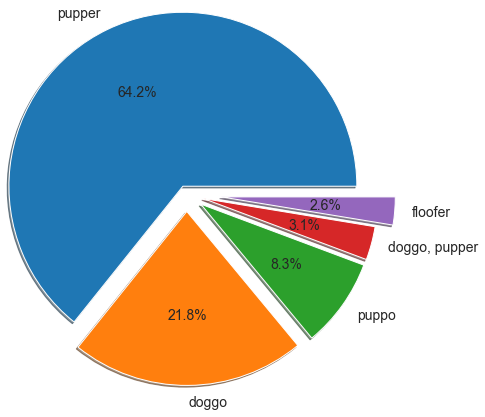

In [308]:
#pie chart using plt.pie
plt.pie(df_dog_stage,
       labels=['pupper','doggo','puppo','doggo, pupper','floofer'],
       autopct='%1.1f%%',
       textprops={'fontsize': 14},
       shadow=True,
       radius=2,
       explode=(0.1,0.2,0.2,0.2,0.4));


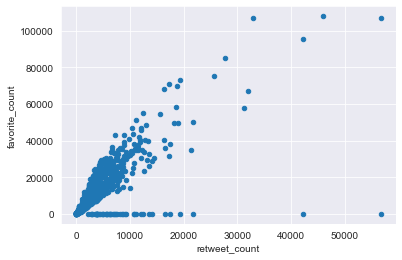

In [296]:
df.plot(x='retweet_count',y='favorite_count',kind='scatter');
#scatter plot showing the forwerd relation between favorite_acounts and retweet_acounts

In [272]:
df.retweet_count.describe()

count     1436.000000
mean      2993.115599
std       4460.507636
min         23.000000
25%        735.750000
50%       1651.500000
75%       3637.500000
max      56625.000000
Name: retweet_count, dtype: float64

In [273]:
df.favorite_count.describe()

count      1436.000000
mean       9115.637187
std       11688.697318
min           0.000000
25%        2119.000000
50%        4579.000000
75%       11907.000000
max      107956.000000
Name: favorite_count, dtype: float64

### Define issue 11
    Removing favorite count equal zero to make the visualization better

### Code issue 11

In [274]:
df_cleanded=df[df['favorite_count']!= 0]

### Test issue 11

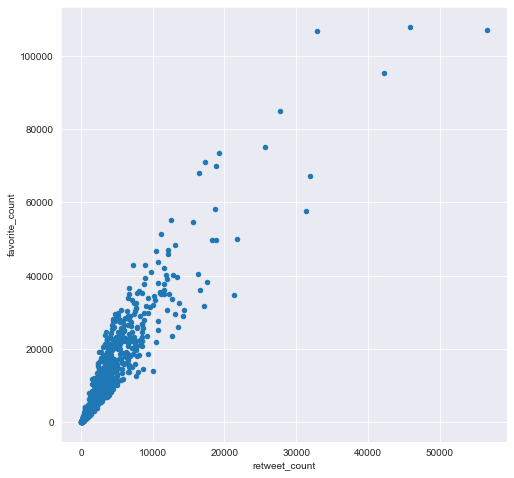

In [275]:
import seaborn as sns
sns.set_style('darkgrid')
df_cleanded.plot(x='retweet_count',y='favorite_count',kind='scatter',figsize=(8,8));
#scatter plot showing the forwerd relation between favorite_acounts and retweet_acounts

C:\Users\sesa536669\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


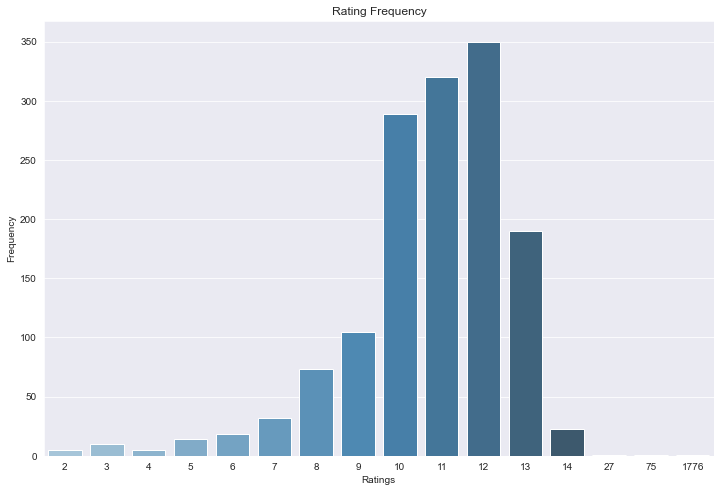

In [276]:
data=df.rating_numerator.value_counts()
x=data.index
y=data.values
fig, ax=plt.subplots(figsize=(12,8));
g=sns.barplot(x,y,palette='Blues_d',ax=ax);
ax.set(xlabel='Ratings',ylabel="Frequency",title='Rating Frequency');
plt.show();